## Logistic regression for a binary classification with a regularization
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Training Data
<hr>

1-1. Load dataset

In [2]:
# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

1-2. Plot the training data

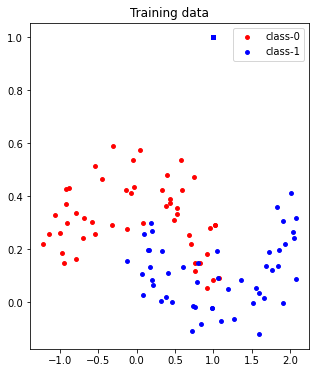

In [3]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=60, c='b', marker='.', label='class-1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Testing Data 
<hr>

2-1. Load dataset

In [4]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

2-2. Plot the testing data

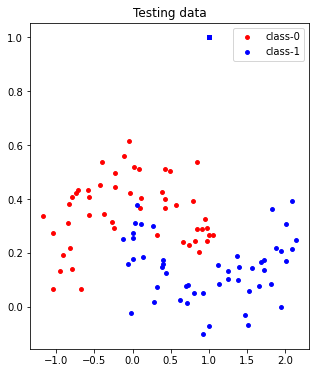

In [5]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=60, c='b', marker='.', label='class-1')
plt.title('Testing data')
plt.legend()
plt.show()

## 3. Logistic regression with a high dimensional feature function
<hr>

3-1. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

In [6]:
def sigmoid(z):
            
    sigmoid_f = 1 / (1 + np.exp(-z))
    
    return sigmoid_f 

3-2 .define a prediction function
<hr>

$$
\begin{aligned}
z &= g(x, y;\theta)
\end{aligned}
$$

In [7]:
import random as rand

w_init = np.zeros([100, 1])
for i in range(100) :
    w_init[i] = rand.uniform(0, 1)

print(w_init)

[[0.79807469]
 [0.2950636 ]
 [0.14926453]
 [0.49482718]
 [0.76413307]
 [0.70924186]
 [0.36934967]
 [0.57533967]
 [0.44800603]
 [0.2949682 ]
 [0.86550986]
 [0.87843952]
 [0.20427388]
 [0.60772767]
 [0.1502457 ]
 [0.06763999]
 [0.50777897]
 [0.75456343]
 [0.31496642]
 [0.19465214]
 [0.14228964]
 [0.30200438]
 [0.33548604]
 [0.76091151]
 [0.10442738]
 [0.61219111]
 [0.02276117]
 [0.71097051]
 [0.89221967]
 [0.57570355]
 [0.02403575]
 [0.79577504]
 [0.44630525]
 [0.87556444]
 [0.36592102]
 [0.79379311]
 [0.9219637 ]
 [0.92316992]
 [0.10284787]
 [0.38778392]
 [0.59540684]
 [0.29561898]
 [0.63042073]
 [0.85699801]
 [0.29717141]
 [0.4576208 ]
 [0.21851482]
 [0.44006891]
 [0.87221192]
 [0.66448964]
 [0.72161614]
 [0.43734363]
 [0.55469532]
 [0.2949368 ]
 [0.11115096]
 [0.05730493]
 [0.73615298]
 [0.53073833]
 [0.72353401]
 [0.5124859 ]
 [0.77851786]
 [0.97600328]
 [0.11265845]
 [0.86378214]
 [0.97662116]
 [0.19269277]
 [0.844636  ]
 [0.37353647]
 [0.28047158]
 [0.45372007]
 [0.35916271]
 [0.00

In [8]:
from random import *

def makeXY(x1, x2):
    
    n = len(x1)
    m = 10
    result = np.zeros([n, m * m])
    
    for i in range(n):
        for j in range(m):
            for k in range(m):
                result[i][j * m + k] = (x1[i] ** j) * (x2[i] ** k)
    
    return result
    

def f_pred(xy, w):
    
    return sigmoid(np.dot(xy, w))

xy_train = makeXY(x1_train, x2_train)
z_train = f_pred(xy_train, w_init)

## 4. Objective Function with a regularization term
<hr>

4-1. define objective function

In [9]:
def loss_func(y_pred, y, lamda, w):
    n = len(y)
    epsilon = 1e-4
    loss = np.dot(-(y.T), np.log(y_pred + epsilon)) - np.dot((1-y).T, np.log(1 - y_pred + epsilon))
    return (loss / n + (lamda / 2) * np.dot(w.T, w))[0][0]


y_train = data_train[:,2][:,None] # label
print(loss_func(z_train, y_train, 0.01 ,w_init))

0.7498386361310958


4-2. define gradient of objective funtion

In [10]:
def grad_loss(y_pred, y, xy_train, lamda, w):
    n = len(y)
    temp1 = (2 * np.dot(xy_train.T, y_pred - y)) / n
    temp2 = lamda * w
    return temp1 + temp2

## 5. Gradient Descent
<hr>

5-1. define gradient descent function

In [11]:
def grad_desc(xy_train, y , w_init, tau, lamda, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        if i % 2000 == 0 :
            tau = tau * 0.9
        y_pred = f_pred(xy_train, w)# linear predicition function   
        grad_f = grad_loss(y_pred, y, xy_train, lamda, w)# gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_func(y_pred, y, lamda, w) # save the current loss value 
        
    return w, L_iters

## 6. Hyper-parameter
<hr>

6-1. define lamda & learning rate

In [12]:
lamdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

## 7.Training
<hr>

7-1. lamda : 0.00001

0.06759575884023293
0.04165216663092575


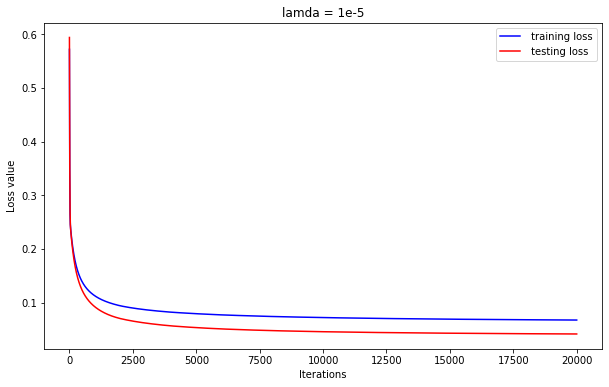

In [13]:
learning_rate = 3e-1
max_iter = 20000

xy_train = makeXY(x1_train, x2_train)
xy_test = makeXY(x1_test, x2_test)

y_train = data_train[:,2][:,None] # label
y_test = data_test[:,2][:,None] # label

# run gradient descent algorithm
w_train_0, L_iters_train_0 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[0], max_iter)
w_test_0, L_iters_test_0 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[0], max_iter)

print(L_iters_train_0[max_iter-1])
print(L_iters_test_0[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_0, c = 'blue', label = ' training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_0, c = 'red', label = ' testing loss')
plt.title('lamda = 1e-5')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-2. lamda : 0.0001

0.08810939831986786
0.0653832180921854


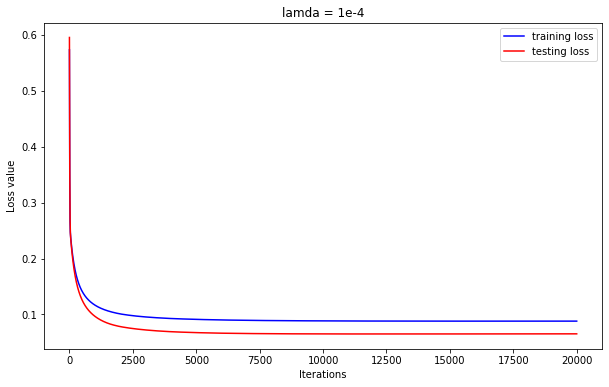

In [14]:
learning_rate = 3e-1
max_iter = 20000

# run gradient descent algorithm
w_train_1, L_iters_train_1 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[1], max_iter)
w_test_1, L_iters_test_1 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[1], max_iter)

print(L_iters_train_1[max_iter-1])
print(L_iters_test_1[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_1, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_1, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-4')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-3. lamda : 0.001

0.1473027409699321
0.13269149889856235


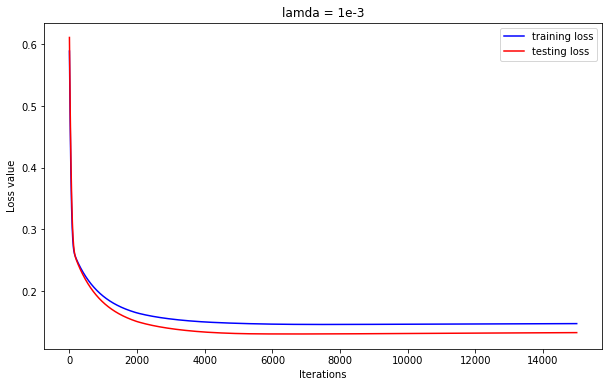

In [19]:
learning_rate = 7e-2
max_iter = 15000

# run gradient descent algorithm
w_train_2, L_iters_train_2 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[2], max_iter)
w_test_2, L_iters_test_2 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[2], max_iter)

print(L_iters_train_2[max_iter-1])
print(L_iters_test_2[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_2, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_2, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-3')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-4. lamda : 0.01

0.22202944517156714
0.2186848708496164


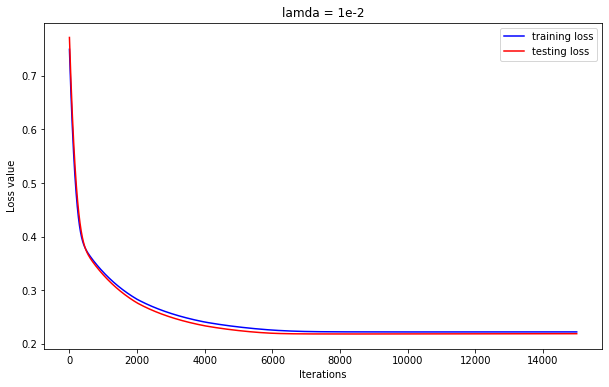

In [20]:
learning_rate = 2e-2
max_iter = 15000

# run gradient descent algorithm
w_train_3, L_iters_train_3 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[3], max_iter)
w_test_3, L_iters_test_3 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[3], max_iter)

print(L_iters_train_3[max_iter-1])
print(L_iters_test_3[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_3, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_3, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-2')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-5. lamda : 0.1

0.2716130136152868
0.2723949910877444


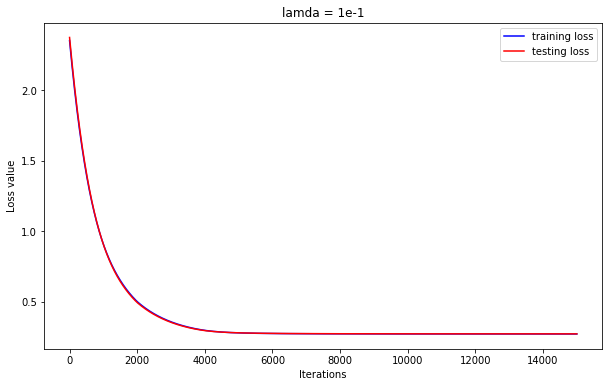

In [21]:
learning_rate = 5e-3
max_iter = 15000

# run gradient descent algorithm
w_train_4, L_iters_train_4 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[4], max_iter)
w_test_4, L_iters_test_4 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[4], max_iter)

print(L_iters_train_4[max_iter-1])
print(L_iters_test_4[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_4, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_4, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-1')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 8. Compute the training accuray

the accuracy is computed based on the training data with varying regularization parameters

In [22]:
w_train_list = [w_train_0, w_train_1, w_train_2, w_train_3, w_train_4]
w_test_list = [w_test_0, w_test_1, w_test_2, w_test_3, w_test_4]

In [23]:
xy_train = makeXY(x1_train, x2_train)
y_train = data_train[:,2][:,None] # label

idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1
n = y_train.size

# lamdas is [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
# w_train_list는 각각의 lamda 값으로 훈련했을 때 w 값
for i in range(len(w_train_list)):
    p = f_pred(xy_train, w_train_list[i])
    idx_class0_pred = (p <= 0.5)
    idx_class1_pred = (p > 0.5)
    
    idx_class0_correct = 0
    idx_class1_correct = 0
    for j in range(n):
        if idx_class0_train[j] == idx_class0_pred[j] == True :
            idx_class0_correct += 1

        if idx_class1_train[j] == idx_class1_pred[j] == True:
            idx_class1_correct += 1
            
    accuracy = ((idx_class0_correct + idx_class1_correct) / n) * 100
    print('====== lamda is ', lamdas[i])
    print('total number of data = ', (n))
    print('total number of correctly classified data = ', (idx_class0_correct + idx_class1_correct))
    print('accuracy(%) = ',  accuracy)

====== lamda is  1e-05
total number of data =  200
total number of correctly classified data =  197
accuracy(%) =  98.5
====== lamda is  0.0001
total number of data =  200
total number of correctly classified data =  197
accuracy(%) =  98.5
====== lamda is  0.001
total number of data =  200
total number of correctly classified data =  195
accuracy(%) =  97.5
====== lamda is  0.01
total number of data =  200
total number of correctly classified data =  188
accuracy(%) =  94.0
====== lamda is  0.1
total number of data =  200
total number of correctly classified data =  171
accuracy(%) =  85.5


## 9. Compute the testing accuracy

In [24]:
xy_test = makeXY(x1_test, x2_test)
y_test = data_test[:,2][:,None] # label

idx_class0_test    = (data_test[:,2]==0) # index of class0
idx_class1_test    = (data_test[:,2]==1) # index of class1
n = y_test.size

# lamdas is [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
# w_train_list는 각각의 lamda 값으로 훈련했을 때 w 값
for i in range(len(w_test_list)):
    p = f_pred(xy_test, w_test_list[i])
    idx_class0_pred = (p <= 0.5)
    idx_class1_pred = (p > 0.5)
    
    idx_class0_correct = 0
    idx_class1_correct = 0
    for j in range(n):
        if idx_class0_train[j] == idx_class0_pred[j] == True :
            idx_class0_correct += 1

        if idx_class1_train[j] == idx_class1_pred[j] == True:
            idx_class1_correct += 1
            
    accuracy = ((idx_class0_correct + idx_class1_correct) / n) * 100
    print('====== lamda is ', lamdas[i])
    print('total number of data = ', (n))
    print('total number of correctly classified data = ', (idx_class0_correct + idx_class1_correct))
    print('accuracy(%) = ',  accuracy)

====== lamda is  1e-05
total number of data =  200
total number of correctly classified data =  198
accuracy(%) =  99.0
====== lamda is  0.0001
total number of data =  200
total number of correctly classified data =  198
accuracy(%) =  99.0
====== lamda is  0.001
total number of data =  200
total number of correctly classified data =  198
accuracy(%) =  99.0
====== lamda is  0.01
total number of data =  200
total number of correctly classified data =  192
accuracy(%) =  96.0
====== lamda is  0.1
total number of data =  200
total number of correctly classified data =  173
accuracy(%) =  86.5


## 10. Probability Map

10-1. lamda is 1e-5

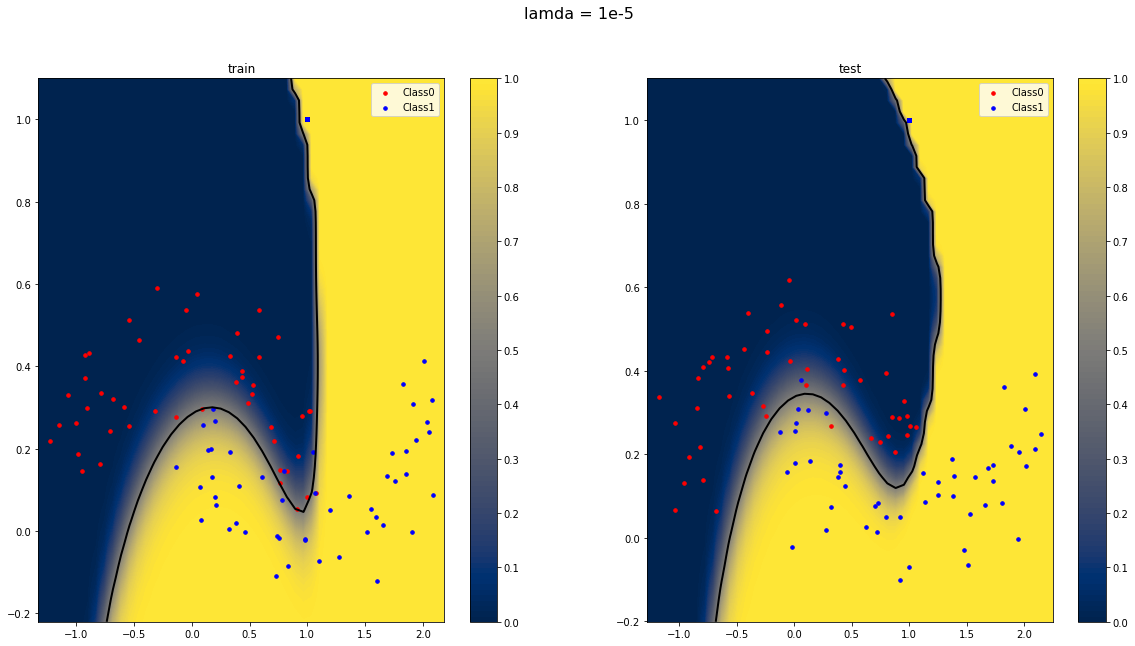

In [25]:
x1_train_min, x1_train_max = x1_train.min() - 0.1, x1_train.max() + 0.1 # min and max of grade 1
x2_train_min, x2_train_max = x2_train.min() - 0.1, x2_train.max() + 0.1 # min and max of grade 2
xx1_train, xx2_train = np.meshgrid(np.linspace(x1_train_min, x1_train_max), np.linspace(x2_train_min, x2_train_max))# create meshgrid

xy_train = makeXY(xx1_train.reshape(2500, -1), xx2_train.reshape(2500, -1))
p0_train = f_pred(xy_train, w_train_list[0])
p0_train = p0_train.reshape(len(xx1_train), -1)

x1_test_min, x1_test_max = x1_test.min() - 0.1, x1_test.max() + 0.1 # min and max of grade 1
x2_test_min, x2_test_max = x2_test.min() - 0.1, x2_test.max() + 0.1 # min and max of grade 2
xx1_test, xx2_test = np.meshgrid(np.linspace(x1_test_min, x1_test_max), np.linspace(x2_test_min, x2_test_max))# create meshgrid

xy_test = makeXY(xx1_test.reshape(2500, -1), xx2_test.reshape(2500, -1))
p0_test = f_pred(xy_test, w_test_list[0])
p0_test = p0_test.reshape(len(xx1_test), -1)


# plot train
fig = plt.figure(figsize=(20, 10))
fig.suptitle('lamda = 1e-5', fontsize = 16)
plt.subplot(1, 2, 1)

cf = plt.contourf(xx1_train, xx2_train, p0_train, cmap = 'cividis', levels = 100)
cbar = plt.colorbar(cf, ticks = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1_train, xx2_train, p0_train, levels = [0.5], linewidths=2, colors='k')
plt.legend()
plt.title('train')


# plot test
plt.subplot(1, 2, 2)

cf = plt.contourf(xx1_test, xx2_test, p0_test, cmap = 'cividis', levels = 100)
cbar = plt.colorbar(cf, ticks = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
cbar.update_ticks()

plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1_test, xx2_test, p0_test, levels = [0.5], linewidths=2, colors='k')
plt.legend()
plt.title('test')
plt.show()

In [26]:
x1_train_min, x1_train_max = x1_train.min() - 0.1, x1_train.max() + 0.1 # min and max of grade 1
x2_train_min, x2_train_max = x2_train.min() - 0.1, x2_train.max() + 0.1 # min and max of grade 2
xx1_train, xx2_train = np.meshgrid(np.linspace(x1_train_min, x1_train_max), np.linspace(x2_train_min, x2_train_max))# create meshgrid

x1_test_min, x1_test_max = x1_test.min() - 0.1, x1_test.max() + 0.1 # min and max of grade 1
x2_test_min, x2_test_max = x2_test.min() - 0.1, x2_test.max() + 0.1 # min and max of grade 2
xx1_test, xx2_test = np.meshgrid(np.linspace(x1_test_min, x1_test_max), np.linspace(x2_test_min, x2_test_max))# create meshgrid

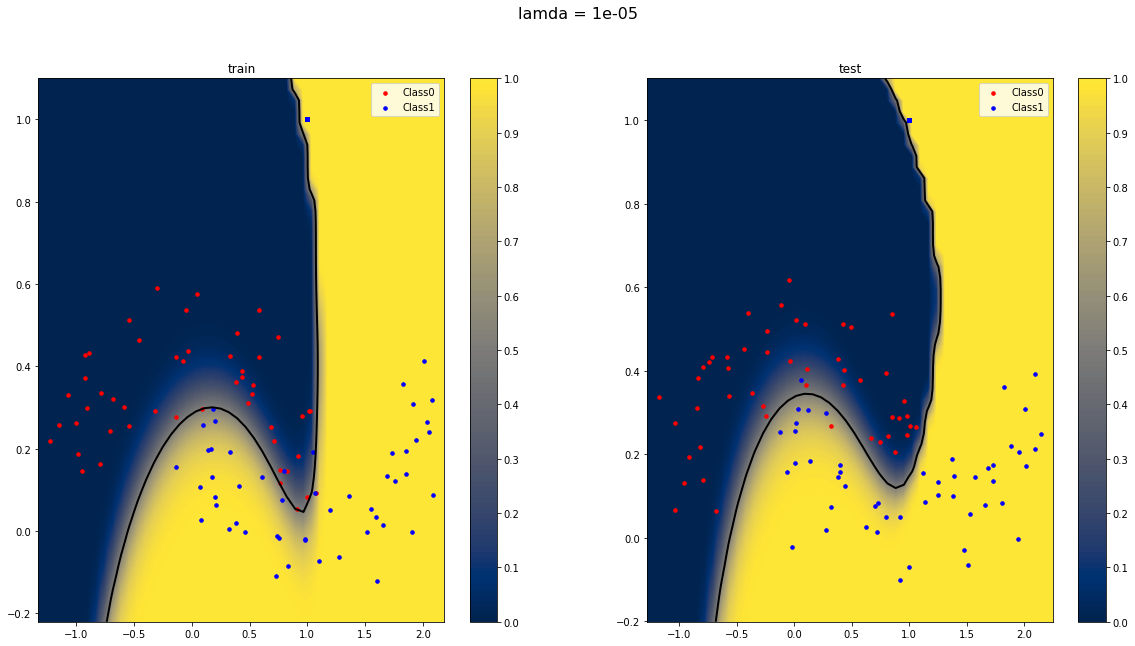

In [ ]:
x1_train_min, x1_train_max = x1_train.min() - 0.1, x1_train.max() + 0.1 # min and max of grade 1
x2_train_min, x2_train_max = x2_train.min() - 0.1, x2_train.max() + 0.1 # min and max of grade 2
xx1_train, xx2_train = np.meshgrid(np.linspace(x1_train_min, x1_train_max), np.linspace(x2_train_min, x2_train_max))# create meshgrid

x1_test_min, x1_test_max = x1_test.min() - 0.1, x1_test.max() + 0.1 # min and max of grade 1
x2_test_min, x2_test_max = x2_test.min() - 0.1, x2_test.max() + 0.1 # min and max of grade 2
xx1_test, xx2_test = np.meshgrid(np.linspace(x1_test_min, x1_test_max), np.linspace(x2_test_min, x2_test_max))# create meshgrid

for i in range(0, len(lamdas)):
    
    xy_train = makeXY(xx1_train.reshape(2500, -1), xx2_train.reshape(2500, -1))
    xy_test = makeXY(xx1_test.reshape(2500, -1), xx2_test.reshape(2500, -1))

    p_train = f_pred(xy_train, w_train_list[i])
    p_train = p_train.reshape(len(xx1_train), -1)
    p_test = f_pred(xy_test, w_test_list[i])
    p_test = p_test.reshape(len(xx1_test), -1)

    # plot train
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('lamda = {}'.format(lamdas[i]), fontsize = 16)
    plt.subplot(1, 2, 1)

    cf = plt.contourf(xx1_train, xx2_train, p_train, cmap = 'cividis', levels = 100)
    cbar = plt.colorbar(cf, ticks = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
    cbar.update_ticks()

    plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='Class0') 
    plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='Class1')
    plt.contour(xx1_train, xx2_train, p_train, levels = [0.5], linewidths=2, colors='k')
    plt.legend()
    plt.title('train')

    # plot test
    plt.subplot(1, 2, 2)

    cf = plt.contourf(xx1_test, xx2_test, p_test, cmap = 'cividis', levels = 100)
    cbar = plt.colorbar(cf, ticks = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
    cbar.update_ticks()

    plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='Class0') 
    plt.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker='.', label='Class1')
    plt.contour(xx1_test, xx2_test, p_test, levels = [0.5], linewidths=2, colors='k')
    plt.legend()
    plt.title('test')
    plt.show()
    

## Output
<hr>